In [1]:
import numpy as np
import scipy.special as sci
import matplotlib
%matplotlib inline

In [2]:
with open('mnist_test.csv', 'r') as f:
    training_file = f.readlines()

training_data = []
for line in training_file:
    line = line.split(',')
    training_data.append([int(line[0]), [int(num) / 255 * 0.98 + 0.01 for num in line[1:]]])
    
with open('mnist_test_10.csv', 'r') as f:
    testing_file = f.readlines()
    
testing_data = []
for line in testing_file:
    line = line.split(',')
    num = int(line[0])
    testing_data.append([int(line[0]), [int(num) / 255 * 0.98 + 0.01 for num in line[1:]]])


In [3]:
expected_nums = {
    0: [0.99, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    1: [0.1, 0.99, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    2: [0.1, 0.1, 0.99, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    3: [0.1, 0.1, 0.1, 0.99, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    4: [0.1, 0.1, 0.1, 0.1, 0.99, 0.1, 0.1, 0.1, 0.1, 0.1],
    5: [0.1, 0.1, 0.1, 0.1, 0.1, 0.99, 0.1, 0.1, 0.1, 0.1],
    6: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.99, 0.1, 0.1, 0.1],
    7: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.99, 0.1, 0.1],
    8: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.99, 0.1],
    9: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.99]
}

In [4]:
from neuralnetwork import NeuralNetwork as NN
num_net = NN(784, 100, 10, 0.2)

for data in training_data:
    num_net.train(data[1], expected_nums[data[0]])


Guess: 2, Target: 2


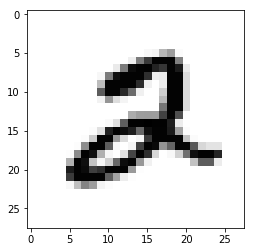

In [8]:
correct = 0
images = []

test_input = testing_data[5]
nn_output = num_net.query(test_input[1])
guess = np.argmax(nn_output)
if guess == test_input[0]:
    correct += 1
    images.append(np.array(test_input[1]).reshape(28, 28))
else:
    images.append(np.array(test_input[1]).reshape(28, 28))
    print('Guess: '+str(guess)+', Target: '+str(test_input[0]))
    print('Number likelihood: '+str(nn_output))

print('Guess: '+str(guess)+', Target: '+str(test_input[0]))
matplotlib.pyplot.imshow(images[0], cmap='Greys', interpolation='None')
# print('Accuracy: '+str(correct)+'%')

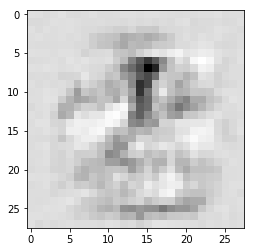

In [13]:
result = num_net.thought_process(expected_nums[9])
img = result.reshape(28, 28)
matplotlib.pyplot.imshow(img, cmap='Greys', interpolation='None')